In [4]:
import requests

compound_name = "cannabidiol"
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{compound_name}/property/MolecularFormula,MolecularWeight,CanonicalSMILES/JSON"

response = requests.get(url)
data = response.json()

data["PropertyTable"]["Properties"][0] # Muestra la información química del CBD


{'CID': 644019,
 'MolecularFormula': 'C21H30O2',
 'MolecularWeight': '314.5',
 'CanonicalSMILES': 'CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O'}

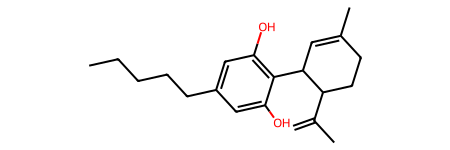

In [5]:
from rdkit import Chem

smiles = 'CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O'
mol = Chem.MolFromSmiles(smiles)
mol

In [6]:
import requests

protein = "SYNGAP1"
url = f"https://string-db.org/api/json/network?identifiers={protein}&species=9606"

response = requests.get(url)
data = response.json()

for interaction in data[:5]:  # Muestra las primeras 5 interacciones
    print(f"{interaction['preferredName_A']} interacciona con {interaction['preferredName_B']} (confianza: {interaction['score']})")


ULK1 interacciona con SYNGAP1 (confianza: 0.823)
ULK1 interacciona con ULK2 (confianza: 0.997)
SHANK2 interacciona con GRIN2B (confianza: 0.628)
SHANK2 interacciona con DLG3 (confianza: 0.744)
SHANK2 interacciona con DLG2 (confianza: 0.811)


In [13]:
from rdkit import Chem
from rdkit.Chem import DataStructs, AllChem

# Definir estructuras en formato SMILES
cbd_smiles = "C1=CC(=C(C=C1CCC2=C(C3=CC=CC=C3O2)O)O)O"  # Estructura del CBD
ligando_conocido_smiles = "CC(C)C1=C(C(=O)NC(=O)C1=O)O"  # Ejemplo de ligando

# Convertir a objetos Mol de RDKit
mol_cbd = Chem.MolFromSmiles(cbd_smiles)
mol_ligando = Chem.MolFromSmiles(ligando_conocido_smiles)

# Calcular huellas moleculares (fingerprints) y similitud de Tanimoto
fp_cbd = AllChem.GetMorganFingerprintAsBitVect(mol_cbd, 2, nBits=1024)
fp_ligando = AllChem.GetMorganFingerprintAsBitVect(mol_ligando, 2, nBits=1024)

similitud = DataStructs.TanimotoSimilarity(fp_cbd, fp_ligando)
print(f"Similitud entre CBD y ligando conocido: {similitud}")

Similitud entre CBD y ligando conocido: 0.058823529411764705


[13:04:45] DEPRECATION WARNING: please use MorganGenerator
[13:04:45] DEPRECATION WARNING: please use MorganGenerator


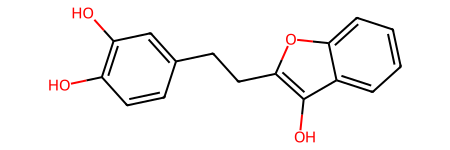

In [ ]:
mol_cbd

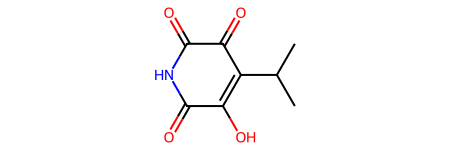

In [12]:
mol_ligando

In [25]:
import pubchempy as pcp

cas_no = '13956-29-1'

In [30]:
c = pcp.Compound.from_cid(644019)
c.iupac_name

'2-[(1R,6R)-3-methyl-6-prop-1-en-2-ylcyclohex-2-en-1-yl]-5-pentylbenzene-1,3-diol'

In [26]:
cannabidiol_id = pcp.get_cids('cannabidiol')
cannabidiol_id

[644019]

In [27]:
pcp.get_properties(['name', 'molecularweight', 'MolecularFormula', 'CanonicalSMILES', 'IUPACName'], identifier=cannabidiol_id)

BadRequestError: 'PUGREST.BadRequest'